<a href="https://colab.research.google.com/github/Raju-24-25/Model-Building-Handsons/blob/main/Copy_of_Linear_Regression_Model_Building_First_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Necessery Libraries**




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##**Dataset Link** - https://drive.google.com/file/d/1K2rjshluuM_znUUvrj0kp-vB7QXc7zIU/view
##*Load The Data and View*

In [ ]:
df = pd.read_csv('/content/new_insurance_data (1).csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.shape

(1338, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.describe()  # Using this line of code we can see all the mathematical information except the Columns of object datatypes

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [ ]:
df.describe(include='O')  # Using this line of code we can see all the information for the Columns of object datatypes

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
df.describe(include='all')  # Using this line of code we can see all the information for all the datatypes

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,1329.000000,1338,1335.000000,1333.000000,1338,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,male,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,676,NaN,NaN,1064,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.310008,NaN,30.665112,1.090773,NaN,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,NaN,13270.422265
std,14.034818,NaN,6.101690,1.201856,NaN,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,NaN,1121.873900
25%,27.000000,NaN,26.302500,0.000000,NaN,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,NaN,9382.033000
75%,51.000000,NaN,34.687500,2.000000,NaN,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,NaN,16639.912515


In [ ]:
df.dtypes  # Using this line of code we get to know for all the columns data types

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
Claim_Amount,float64
past_consultations,float64
num_of_steps,float64
Hospital_expenditure,float64
NUmber_of_past_hospitalizations,float64


##**Performing EDA - Exploratory Data Analysis**

EDA Steps to folow to build ML Model:

Basic func Shape, Size, Info, Describe

Null Values

Duplicated rows

Outliers

Label encoding

Standardization and Normalization

Feture selection

Feture engineering (PCA and LDA)

Model Building:
  
 * Split the data to x and Y

 * Train test split

 * Build Model

 * Fit model

 * Predict outputs

 * Check performance

 * Hyper parameter tuning

In [ ]:
df.isnull().sum()  # Column wise null values present in the data

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.isnull().sum().sum()  # Here another sum is used to fetch the total number of null values present in the data

np.int64(52)

In [ ]:
df.isnull().sum()/len(df)*100  # Null values are shown here in percentage

,0
age,0.672646
sex,0.000000
bmi,0.224215
children,0.373692
smoker,0.000000
Claim_Amount,1.046338
past_consultations,0.448430
num_of_steps,0.224215
Hospital_expenditure,0.298954
NUmber_of_past_hospitalizations,0.149477


As the null values are very less compare to the data given that is why we can drop those null values.

In [ ]:
df.dropna(inplace=True)  # Code to drop the Null Values present in the Given data.

In [ ]:
df.isnull().sum().sum()  # Checking for further presence of null values, and we can see clearly all the null values has been dropped.

np.int64(0)

In [ ]:
df.duplicated().sum()    # Checking for duplicate values present in the data.

np.int64(0)

Here we can see there is no duplicate values, If any case we found any duplicates we have to drop those rows as that rows are waste of time memory and yet no use of those rows.

In [ ]:
df.drop_duplicates(inplace=True)   # This line of code is used to drop the duplicated values present in the dataset.

In [ ]:
col = list(df.columns)    # Listing the columns present in the data

In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

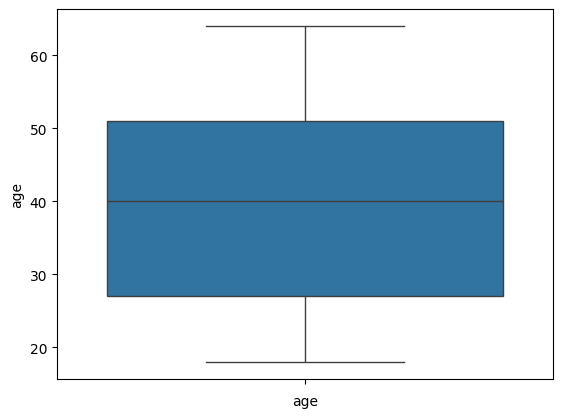

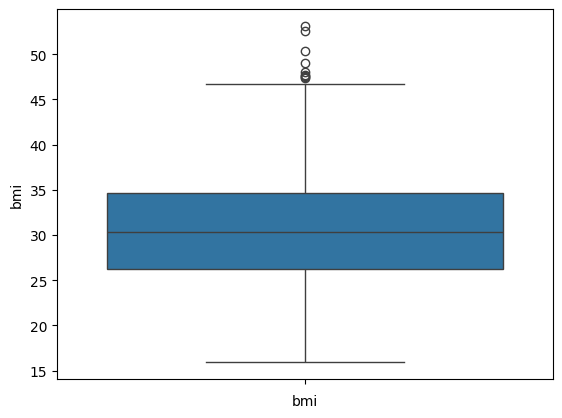

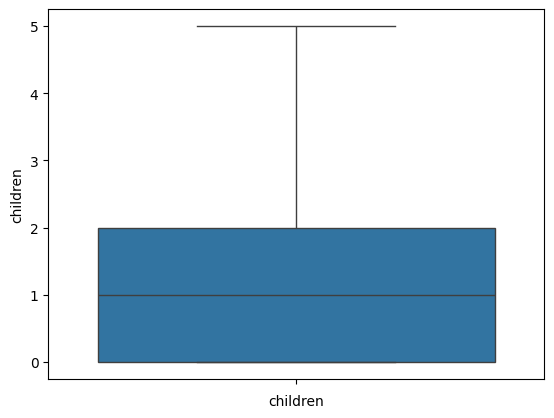

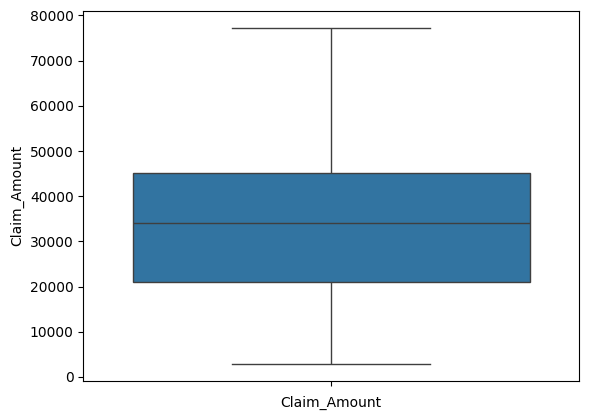

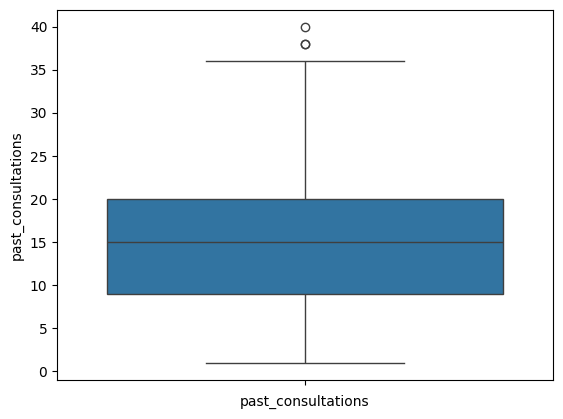

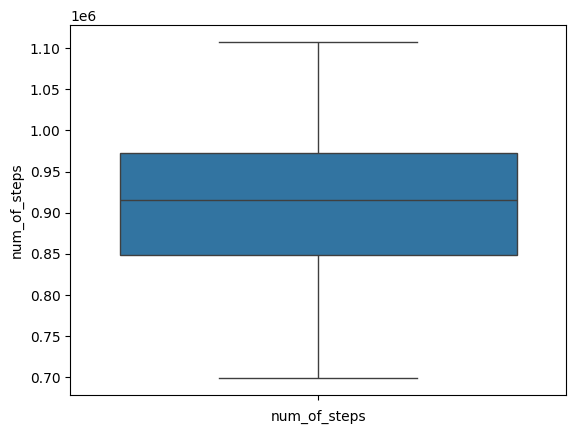

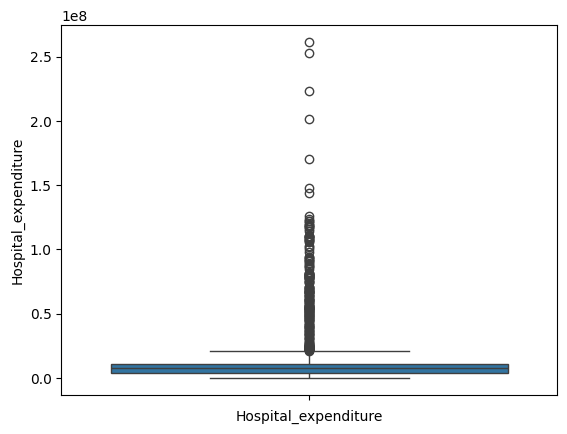

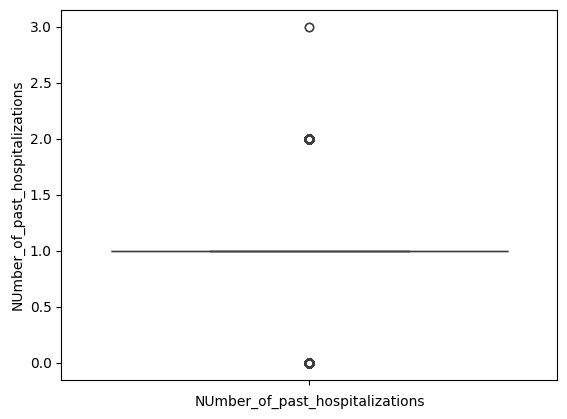

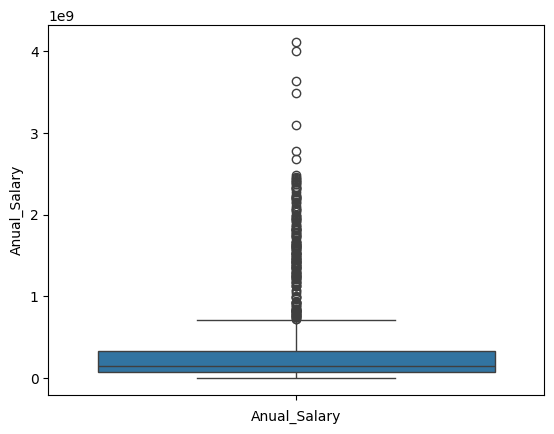

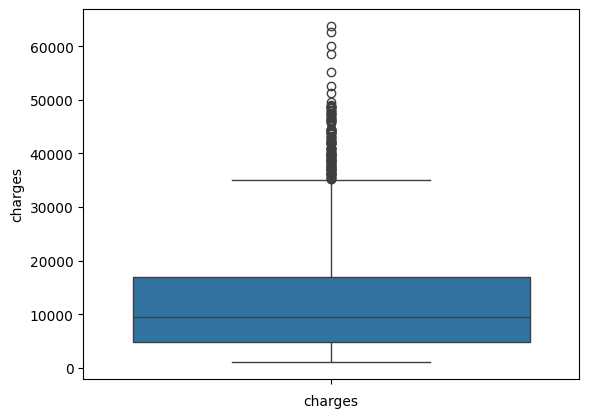

In [ ]:
for i in col:
  if df[i].dtypes != "object":
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

# For now though the 'charges' column i.e the target column has outliers but still I'll not take that column to remove the outliers. As the target column is dependent over other independent clumns so when we remove the outliers from those columns, by default it will remove the corressponding outliers from the target column.

In [ ]:
col_outlier = ["bmi","past_consultations","Hospital_expenditure","Anual_Salary"]

In [ ]:
# Crating a Function to Remove The Outliers

def outlier_remover (df):
  for i in col_outlier:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3 - Q1

    LB = Q1 - (1.5*IQR)
    UB = Q3 + (1.5*IQR)

    df = df[(df[i]>=LB)&(df[i]<=UB)]

In [ ]:
outlier_remover(df)

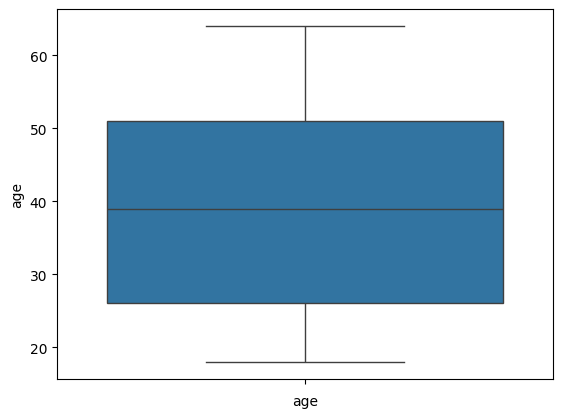

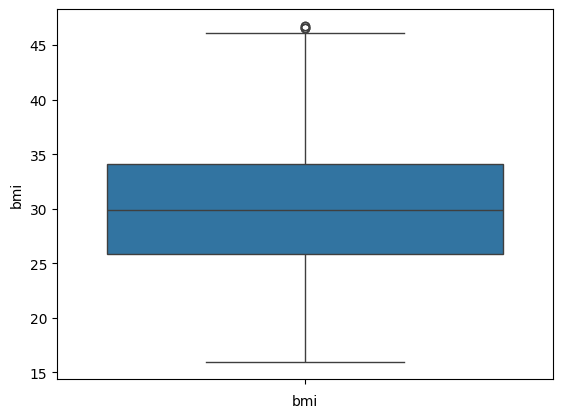

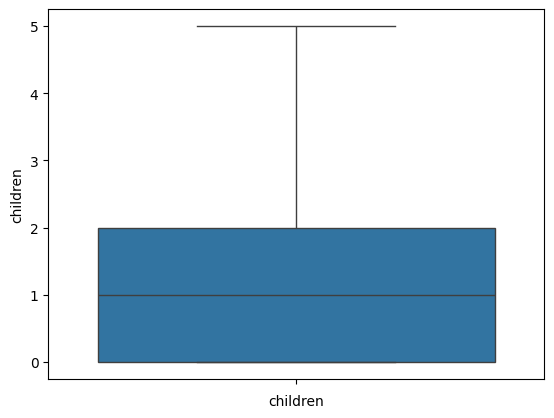

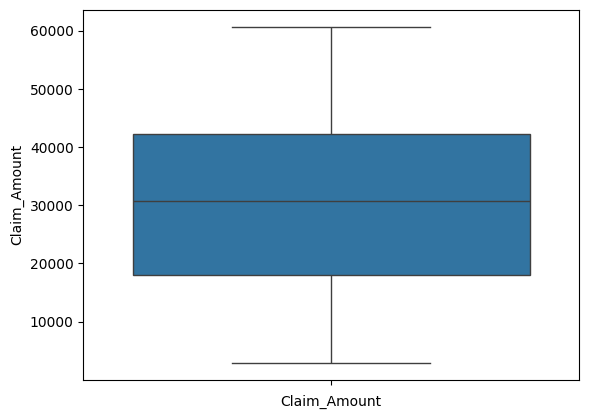

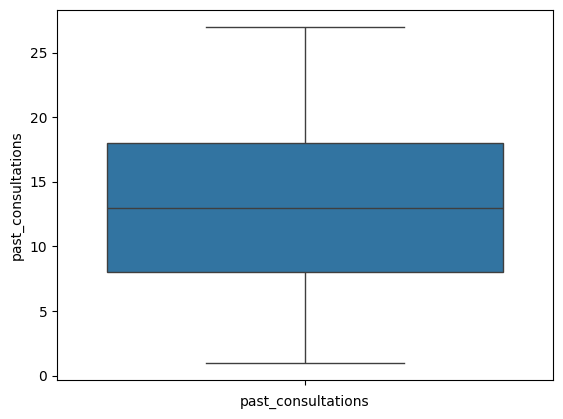

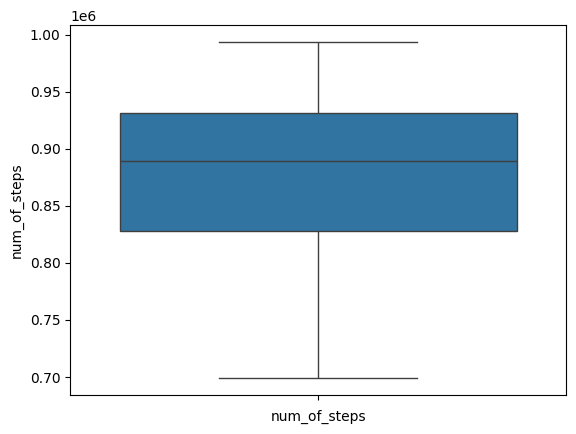

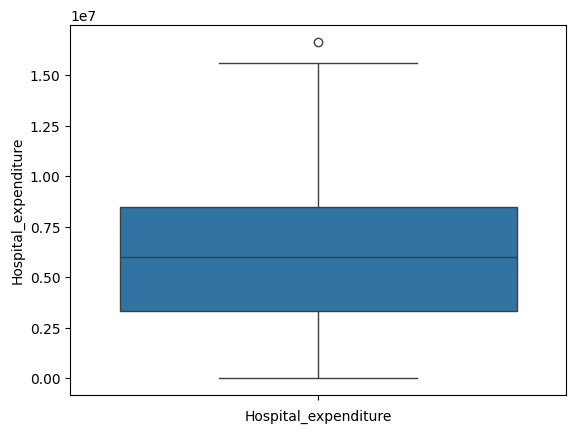

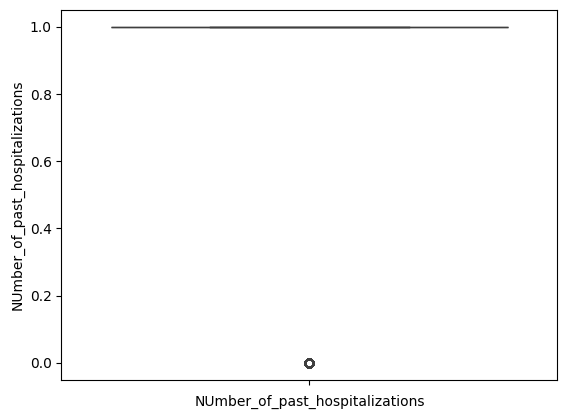

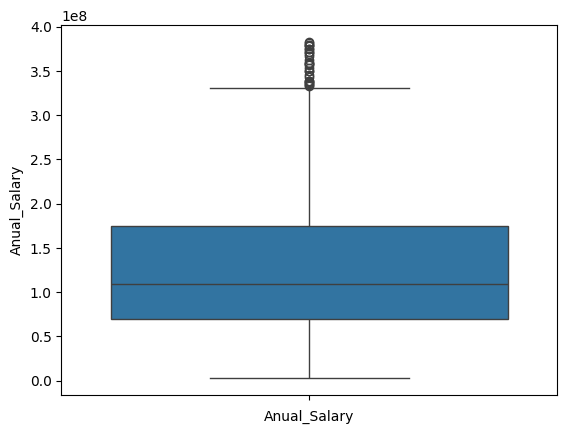

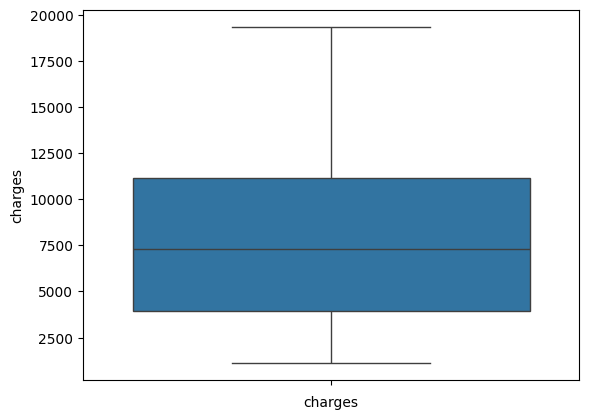

In [ ]:
for i in col:
  if df[i].dtypes != 'object':
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

##**Model Building:**
*  Split the data to x and Y
*  Train test split
*  Build Model
*  Fit model
*  Predict outputs
*  Check performance

In [ ]:
# Importing the necessery Libraries for Model Building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Split the Data to X and Y
X = df.loc[ : ,["age",
            "bmi","children",
            "Claim_Amount","past_consultations",
            "num_of_steps","Hospital_expenditure",
            "NUmber_of_past_hospitalizations","Anual_Salary"]]

Y = df.loc[ : ,["charges"]]

In [ ]:
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1036,43.0,20.13,2.0,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08
1041,24.0,27.60,0.0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08
1046,29.0,27.94,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.90,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08


In [ ]:
Y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1036,18767.73770
1041,18955.22017
1046,19107.77960
1048,19199.94400


In [ ]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
# Build Model
model = LinearRegression()

In [ ]:
# Fit Model
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict Outputs
predicted_values = model.predict(x_test)

In [ ]:
# Output Vlaues
predicted_values

array([[ 4194.64254698],
       [10270.91933829],
       [ 1337.52725013],
       [ 5232.13065659],
       [12117.9001652 ],
       [ 7114.76386945],
       [ 6718.18815631],
       [ 9151.93553429],
       [10738.66930491],
       [ 4050.18727825],
       [ 5919.6438664 ],
       [12875.50217398],
       [12349.16992876],
       [ 4475.54586919],
       [10480.94430437],
       [ 1349.20490826],
       [13599.70377417],
       [ 9041.75484914],
       [12490.24157884],
       [ 4449.92235371],
       [ 1890.82662573],
       [ 7065.3986711 ],
       [ 2207.75744459],
       [11146.82928172],
       [ 1604.62515911],
       [ 5012.25200546],
       [ 5676.08507102],
       [ 3756.83333642],
       [11900.8622589 ],
       [10604.97419089],
       [10661.91999194],
       [ 8461.10718012],
       [12498.98586086],
       [11486.41305567],
       [ 3999.158151  ],
       [ 1936.53008038],
       [ 1348.2238785 ],
       [ 8388.79632454],
       [ 7469.73654385],
       [ 4731.78247429],


In [ ]:
result = pd.DataFrame(columns = ['Actual Value','Predicted Values'])

result['Actual values'] = y_test
result['Predicted Values'] = predicted_values

result

,Actual Value,Predicted Values,Actual values
248,NaN,4194.642547,3756.62160
730,NaN,10270.919338,10338.93160
37,NaN,1337.527250,1633.04440
397,NaN,5232.130657,5458.04645
759,NaN,12117.900165,10806.83900
...,...,...,...
385,NaN,5135.743419,5354.07465
568,NaN,7644.092784,7985.81500
978,NaN,15040.885570,14901.51670
757,NaN,11600.612261,10796.35025


In [ ]:
# Checking Performances
from sklearn.metrics import *

In [ ]:
r2_score(y_test,predicted_values)   # If the value is closer to 1, that says the predictions are closer to the actual data

0.9652719458987592

In [ ]:
r2_score(y_test,predicted_values)*100    # This line of code is showing the accuracy in percentage

96.52719458987592

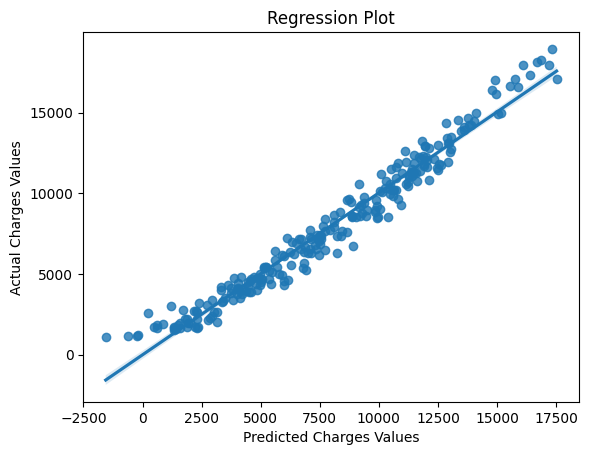

In [ ]:
# Plotting the Regression Plot
sns.regplot(x = predicted_values, y = y_test)
plt.xlabel("Predicted Charges Values")
plt.ylabel("Actual Charges Values")
plt.title("Regression Plot")
plt.show()